# Colorado Elk Exploratory Data Analysis

## Packages

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [3]:
App_Preference_init = pd.read_excel('Input-Data//All-Applicant-Preference_Points.xlsx')
Draw_Preference_init = pd.read_excel('Input-Data//All-Draw-Preference_Points.xlsx')
Tags_Awarded_init = pd.read_excel('Input-Data//Number-Awarded.xlsx')
No_App_init = pd.read_excel('Input-Data//Number-Of-Applicants.xlsx')
Min_Preference_init = pd.read_excel('Input-Data//Minimum-Preference_Points.xlsx')
Avg_Preference_init = pd.read_excel('Input-Data//Average-Preference_Points.xlsx')

## Evaluation for Point Creep

In [160]:
#Isolate applicable columns to determine point creep for adult residents
Avg_Preference_PC = Avg_Preference_init[['Hunt Code','Year','Adult-Res Average']].sort_values(by=['Hunt Code','Year'])

#Dictionary to determine the difference in minimum points to draw each year
Avg_Preference_PC['Point Creep (Prev Year)'] = 0
for i in range (0,len(Avg_Preference_PC)):
    if i == 0:
        Pt_Delta = 0
        Avg_Preference_PC.iloc[i,3] = Pt_Delta
    elif (Avg_Preference_PC.iloc[i,0] == Avg_Preference_PC.iloc[i-1,0]):
        Pt_Delta = Avg_Preference_PC.iloc[i,2] - Avg_Preference_PC.iloc[i-1,2]
        Avg_Preference_PC.iloc[i,3] = Pt_Delta
    else:
        Pt_Delta = 0
        Avg_Preference_PC.iloc[i,3] = Pt_Delta

#Isolate years where there was an increase in 0.5 average points required to draw
Avg_Preference_PC_Filtered = Avg_Preference_PC.loc[(Avg_Preference_PC['Point Creep (Prev Year)']) > .5]

#Group the hunt codes to see the quantity of years that there was an increase in min points to draw
Avg_Preference_PC_Grouped = Avg_Preference_PC_Filtered.groupby('Hunt Code')['Adult-Res Average'].count().reset_index()

#Rename Columns
Avg_Preference_PC_Output = Avg_Preference_PC_Grouped.rename(\
    columns={'Adult-Res Average':'No. of Point Creep Years'})

# Isolate columns of interest and sory by hunt code and year
Min_Points_Init = Min_Preference_init[['Hunt Code','Year','Adult-Res Min']].loc[Min_Preference_init['Adult-Res Min'] >= 10]
    
# Get the minimum points for the last year
Lastest_Min_Init = Min_Points_Init[['Hunt Code','Adult-Res Min','Year']].sort_values(by=['Hunt Code','Year'],ascending=False).drop_duplicates('Hunt Code')

#Isolate Units where the minimum points where at least 10
Qual_Units = Lastest_Min_Init.loc[Lastest_Min_Init['Adult-Res Min'] >= 10]

# Merge the number of years with point creep to qualifying units
Point_Creep_Eval_Init = Qual_Units.merge(Avg_Preference_PC_Output,on='Hunt Code',how='left')

#Current Hybrid List
HybridList = ['EE001E1R','EE002E1R','EE002O1A','EE005W1R','EE010E1R' \
    ,'EE010O1A','EE010W1R','EE084W1R','EE084W2R','EE085W1R'
    ,'EE104W1R','EE201E1R','EE851W1R','EM001O1M','EM002O1M'
    ,'EM010O1M','EM061O1M','EM201O1M','EM851O1R','EM851O3R'
    ,'EE010O1A']

#Indicate if they are currently on the Hybrid List
Point_Creep_Eval_Init['On Hybrid List'] = ['Yes' if x in HybridList else 'No' for x in Point_Creep_Eval_Init['Hunt Code']]

#Isolate Hunt Codes not on the Hybrid List and Sort by No. of Point Creep Years
Point_Creep_Eval = Point_Creep_Eval_Init.sort_values('No. of Point Creep Years',ascending=False)

Point_Creep_Eval.head(10)

,Hunt Code,Adult-Res Min,Year,No. of Point Creep Years,On Hybrid List
34,EE023W1R,23.0,2022,6.0,No
10,EM010O1M,15.0,2022,5.0,Yes
3,EM851O1R,13.0,2022,5.0,Yes
14,EE851W1R,27.0,2022,5.0,Yes
25,EE084W1R,28.0,2022,5.0,Yes
35,EE011W1R,20.0,2022,5.0,No
29,EE040W1R,27.0,2022,5.0,No
30,EE040O2R,10.0,2022,5.0,No
20,EE201O1A,13.0,2022,4.0,No
1,EM851O3R,18.0,2022,4.0,Yes


# Visualizing Data

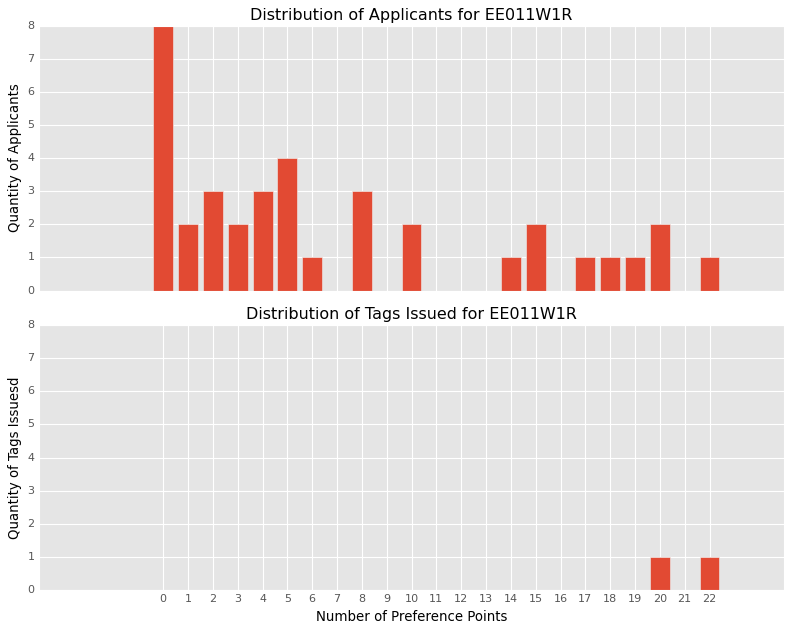

In [164]:
#Indicate Hunt Code
HuntCode = 'EE011W1R'

#Indicate Draw Type
ApplicantType = 'Adult-Res'

#Year (2015-2022)
Year = 2022

App_Preference = App_Preference_init.loc[App_Preference_init['Hunt Code'] == HuntCode]
Draw_Preference = Draw_Preference_init.loc[Draw_Preference_init['Hunt Code'] == HuntCode]
Tags_Awarded = Tags_Awarded_init.loc[Tags_Awarded_init['Hunt Code'] == HuntCode]
No_App = No_App_init.loc[No_App_init['Hunt Code'] == HuntCode]
Min_Preference = Min_Preference_init.loc[Min_Preference_init['Hunt Code'] == HuntCode]
Avg_Preference = Avg_Preference_init[Avg_Preference_init['Hunt Code'] == HuntCode]

#Set Style
plt.style.use('ggplot')

#Create Variable for Applicant type
App_Type = 'A-'+ApplicantType

#Isolate columns of interest
Applicants = App_Preference[['Preference Points',App_Type,'Year']]

#Isolate the number of applicants in the year indicated
Applicants_Year = Applicants.loc[Applicants['Year'] == Year]

#Create Variable for Applicant type
Draw_Type = 'D-'+ApplicantType

#Isolate columns of interest
Drew = Draw_Preference[['Preference Points',Draw_Type,'Year']]

#Drew in year indicated
Drew_Year = Drew.loc[Drew['Year'] == Year]

x = Applicants_Year['Preference Points']
y = Applicants_Year[App_Type]
a = Drew_Year['Preference Points']
b = Drew_Year[Draw_Type]

#Create a figure and axes object
fig,ax = plt.subplots(2,sharex=True, sharey=True, figsize = (10,8))

#Bar plot for number of applicants
ax[0].bar(x,y)

#Set Labeling
ax[0].set_title('Distribution of Applicants for '+ HuntCode,color='black')
ax[0].set_ylabel('Quantity of Applicants',color='black')

#Setting ticks
ax[0].set_yticks(np.arange(0,max(y)+1,1))

# Bar plot for applicants who drew
ax[1].bar(a,b)

#Set Labeling
ax[1].set_title('Distribution of Tags Issued for '+ HuntCode, color='black')
ax[1].set_ylabel('Quantity of Tags Issuesd',color='black')

#Set shared x-axis labels
ax[1].set_xlabel('Number of Preference Points',color='black')

#Setting ticks
ax[1].set_xticks(np.arange(0,max(x)+1,1))

#Adjust subplot params, so that the subplots fit in to the figure area
plt.tight_layout()

plt.show()